# Random Number Generation Techniques

## Linear Congruential Method:
<img src='lcd.jpeg' width="800" height="400">

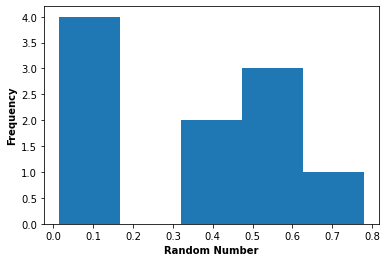

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def lcd(a, X0, c, m, n):
    """
    Linear Congruential Method
    arguements
        a  : constant multiplier
        X0 : seed number
        c  : increment
        m  : modulus
        n  : number of random numbers

    returns a tuple of 
        Rn : array of random number
    """
    Xn = X0
    Rn = []
    for i in range(n):
        X_next = (a * Xn + c) % m
        Rn.append(X_next / m)
        Xn = X_next
        
    return Rn

a = 29 
m = 16384 
X0 = 24 
c = 83 
n = 10
Rn = lcd(a, X0, c, m, n)

# Plot histogram of the generated random numbers
plt.hist(Rn,bins='auto')
plt.xlabel('Random Number', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

## Multiplicative Congruential Method:

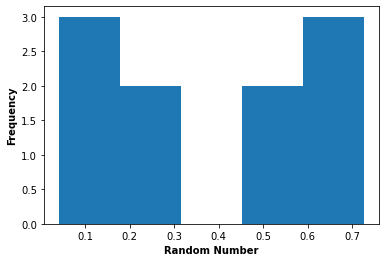

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


def mcd(a, X0, m, n):
    """
    Multiplicative Congruential Method
    arguements
        a  : constant multiplier
        X0 : seed number
        m  : modulus
        n  : number of random numbers

    returns a tuple of
        Rn : array of random numbers
    """

    Xn = X0
    Rn = []
    for i in range(n):
        X_next = (a * Xn) % m
        Rn.append(X_next / m)
        Xn = X_next
        
    return Rn

a = 29
m = 16384
X0 = 24
n = 10
Rn = mcd(a, X0, m, n)


# Plot histogram of the generated random numbers
plt.hist(Rn,bins='auto')
plt.xlabel('Random Number', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

# Random Variate  Generation Techniques

## Exponential Distribution:
<img src='ed.jpeg' width="600" height="400">

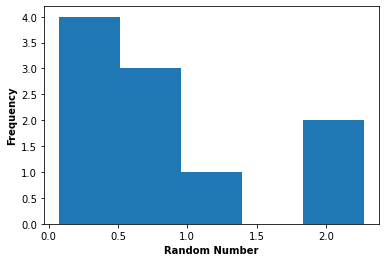

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def ed(lamda, Rn):
    """
    Exponential Distribution
    arguements 
        lamda : mean 
        Rn    : array of random numbers
    returns 
        Xn : array of Random Variate
    """
    n = len(Rn)
    Xn = []
    for i in range(n):
        Xi = (-1 / lamda) * math.log(1 - Rn[i])
        Xi = round(Xi, 4)
        Xn.append(Xi)
    return Xn

lamda = 1
Rn = np.random.random_sample(size = 10)
# Rn = [0.3, 0.2, 0.1, 0.5, 0.6]
Xn = ed(lamda, Rn)
Rn

# Plot histogram of the generated random numbers
plt.hist(Xn,bins='auto')
plt.xlabel('Random Number', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

## Uniform Distribution:

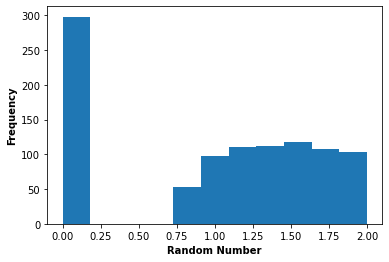

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def ud(a, b, Rn):
    """
    Uniform Distribution
    arguements 
        a  : lower limit in interval
        b  : upper limit in interval
        Rn : array of Sample Data
    returns 
        Xn : array of Random Variate
    """
    n = len(Rn)
    Xn = []
    for i in range(n):
        if(Rn[i] < a):
            Xi = 0
        elif(Rn[i] > b):
            Xi = 1
        else:
            Xi = a + (b - a) * Rn[i]

        Xi = round(Xi, 3)
        Xn.append(Xi)
    return Xn


a = 0.3
b = 2
Rn = np.random.random_sample(size = 1000)
# Rn = [0.3, 0.25, 0.8, 0.75, 2.5]
Xn = ud(a, b, Rn)
# print(Xn)

# Plot histogram of the generated random numbers
plt.hist(Xn,bins='auto')
plt.xlabel('Random Number', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

## Weibull Distribution:
<img src='wd.jpeg' width="600" height="400">

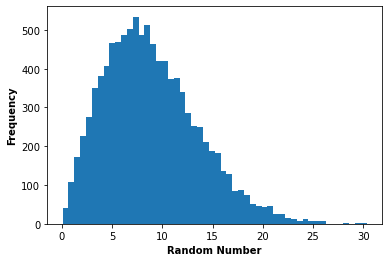

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


def wd(alpha, beta, Rn):
    """
    Weibull Distribution
    arguements 
        alpha : slope 
        beta  : shape
        Rn    : array of Sample Data
    returns 
        Xn : array of Random Variate
    """
    n = len(Rn)
    Xn = []
    for i in range(n):
        Xi = alpha * (-math.log(1 - Rn[i])) ** (1 / beta)
        Xi = round(Xi, 3)
        Xn.append(Xi)

    return Xn

alpha = 10
beta = 2
# Rn = np.random.random_sample(size = 10000)
Rn = [0.1, 0.6, 0.5, 0.8, 0.2, 0.45]
Xn = wd(alpha, beta, Rn)

# Plot histogram of the generated random numbers
plt.hist(Xn,bins='auto')
plt.xlabel('Random Number', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

## Gamma Distribution:

[1.347, 0.083, 0.05, 0.151]


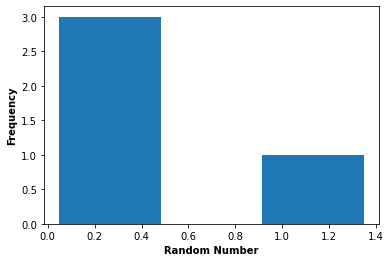

In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


def single_gamma(beta, theta, Rn):
    a = (2 * beta - 1) ** (1 / 2)
    b = 2 * beta - math.log(4) + (1 / a)
    temp1 = beta * ((Rn[0] / (1 - Rn[0])) ** a)
    temp2 = b - math.log(Rn[0] * Rn[0] * Rn[1])
    if(temp1 <= temp2):
        X = temp1 / (beta * theta)
    else:
        X = -1
    return X


def gamma(beta, theta, Rn):
    """
    gamma distribution
    arguements 
        beta : slope
        theta : mean in degrees
        Rn : array of random numbers
    returns 
        X : array of random variate
    """
    Xn = []
    for i in range(0, len(Rn), 2):
        Xi = single_gamma(beta, theta, Rn[i:i+2])
        Xi = round(Xi, 3)
        if Xi != -1:
            Xn.append(Xi)
    return Xn


beta = 2.3
theta = 0.4545
# Rn = np.random.random_sample(size = 1000)
Rn = [0.4357, 0.1806, 0.1508, 0.8353, 0.1202, 0.8004, 0.9550, 0.1460, 0.196, 0.234]
Xn = gamma(beta, theta, Rn)
print(Xn)

# Plot histogram of the generated random numbers
plt.hist(Xn,bins='auto')
plt.xlabel('Random Number', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()